# Webscrapping using BeautifulSoup

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap Indonesian inflation rate from www.bi.go.id , it's a official Indonesian bank that provide a couple useful financial information. To do this we will only use a couple default library from python and BeautifulSoup. 

This module is made as easy and simple as possible which can be used for new developer to learn how to webscrapping using Beautiful Soup. But to do webscrapping you will need a bit of knowlage in `html` which I'll also try to help to explain what you needed at this module, but it is always better if you understand a bit what in `html` first. You can read it quickly at [beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) documentation. It explain what is html and what beautiful soup exactly do at it landing page. 

## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use at bis module : 

- beautifulSoup4
- pandas
- matplotlibs

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the Bank Indonesia inflation rate page, you can click [here](https://www.bi.go.id/id/moneter/inflasi/data/Default.aspx) to follow what exactly that link goes to. 

In [25]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [39]:
url_get.content[1:5965050]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.com" />\n<meta name="robots" content="follow, index" />\n<meta name="revisit-after" content="7 days" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="google-site-verificatio

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [40]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [43]:
print(soup.prettify()[:5965050])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/capture.png">

The information that we need are the month and the inflation rate each month, which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this. 

<img src="asset/capture_1.png">

From inspect element we know that we need to find the line table with class `table`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [37]:
table = soup.find('table', attrs={'table'})
print(table.prettify()[1:5965050])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   23 Desember 2019
  </td>
  <td>
   128,39
  </td>
  <td>
   127,10
  </td>
 </tr>
 <tr>
  <td>
   20 Desember 2019
  </td>
  <td>
   128,63
  </td>
  <td>
   127,34
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   19 Desember 2019
  </td>
  <td>
   128,24
  </td>
  <td>
   126,93
  </td>
 </tr>
 <tr>
  <td>
   18 Desember 2019
  </td>
  <td>
   128,64
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr class="verySoft

As we can see, we find a right lines with information we want. I'll explain a bit about the HTML codes you need to know : 

- `th` stand for table header/header cell
- `tr` stand for table row
- `td` stand for standard cell 

That's all term in HTML `table` that you need to know. Now we can pull it one by one, but we will use looping to make our job easier. But first let's make one object that will find all `tr` in `table` to help us in looping (so we can loop with the length of the table row).

In [38]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named it `temp` and it's a tuple. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [31]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    period = row.find_all('td')[0].text
    period = period.strip() #for removing the excess whitespace
    
    #get inflasi
    inflation = row.find_all('td')[1].text
    inflation = inflation.strip() #for removing the excess whitespace
    
    temp.append((period,inflation)) 
    
temp 

[('31\xa0Desember\xa02019', '128,62'),
 ('30\xa0Desember\xa02019', '128,30'),
 ('27\xa0Desember\xa02019', '128,11'),
 ('26\xa0Desember\xa02019', '128,27'),
 ('23\xa0Desember\xa02019', '128,39'),
 ('20\xa0Desember\xa02019', '128,63'),
 ('19\xa0Desember\xa02019', '128,24'),
 ('18\xa0Desember\xa02019', '128,64'),
 ('17\xa0Desember\xa02019', '128,62'),
 ('16\xa0Desember\xa02019', '128,67'),
 ('13\xa0Desember\xa02019', '128,30'),
 ('12\xa0Desember\xa02019', '130,04'),
 ('11\xa0Desember\xa02019', '129,65'),
 ('10\xa0Desember\xa02019', '129,56'),
 ('09\xa0Desember\xa02019', '129,76'),
 ('06\xa0Desember\xa02019', '129,78'),
 ('05\xa0Desember\xa02019', '130,10'),
 ('04\xa0Desember\xa02019', '130,79'),
 ('03\xa0Desember\xa02019', '130,15'),
 ('02\xa0Desember\xa02019', '129,36'),
 ('29\xa0November\xa02019', '129,44'),
 ('28\xa0November\xa02019', '129,47'),
 ('27\xa0November\xa02019', '129,84'),
 ('26\xa0November\xa02019', '129,82'),
 ('25\xa0November\xa02019', '130,20'),
 ('22\xa0November\xa02019

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our tuple we can use `::-1` to do that. 

In [8]:
temp = temp[::-1]
temp

[('Februari 2018', '3.18 %'),
 ('Maret 2018', '3.40 %'),
 ('April 2018', '3.41 %'),
 ('Mei 2018', '3.23 %'),
 ('Juni 2018', '3.12 %'),
 ('Juli 2018', '3.18 %'),
 ('Agustus 2018', '3.20 %'),
 ('September 2018', '2.88 %'),
 ('Oktober 2018', '3.16 %'),
 ('Nopember 2018', '3.23 %'),
 ('Desember 2018', '3.13 %'),
 ('Januari 2019', '2.82 %'),
 ('Februari 2019', '2.57 %'),
 ('Maret 2019', '2.48 %'),
 ('April 2019', '2.83 %'),
 ('Mei 2019', '3.32 %'),
 ('Juni 2019', '3.28 %'),
 ('Juli 2019', '3.32 %'),
 ('Agustus 2019', '3.49 %'),
 ('September 2019', '3.39 %')]

Then after we fix our tuple a bit, as usual we will input it to pandas' dataframe.

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','inflation'))
df.head()

,period,inflation
0,Februari 2018,3.18 %
1,Maret 2018,3.40 %
2,April 2018,3.41 %
3,Mei 2018,3.23 %
4,Juni 2018,3.12 %


After this just usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change the inflation to float datatype, but before we can do that we need to clean the " %" first. After the it on the right data type we can do simple visualisation using matplotlib.

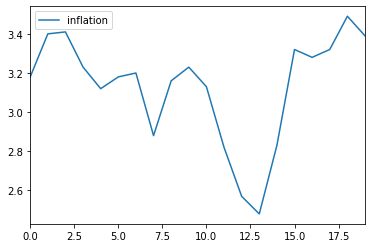

In [12]:
df['inflation'] = df['inflation'].str.replace(" %","")
df['inflation'] = df['inflation'].astype('float64')

df.plot()

In conclution when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like `scrapy` that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images). 

After this you also can implement the scrapping to one function and put it at the flask webapp, which you can find the demo [here](https://github.com/t3981-h/LikesRatio) and you can go to inflation branch to see example that scrap a same page or you can visit [Pricemate](https://github.com/onlyphantom/pricemate). Which scrap tiket.com data to get train price list. I hope this short module help you to understand and can kickstart you to learn more about webscrapping using Beautifulsoup. Also feel free to contact us at mentor@algorit.ma if you have more question.

Happy learning~